# 타이타닉 데이터셋 분석 및 생존자/사망자 예측

### 2021100894 심희영

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df=pd.read_csv('./train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna('N', inplace = True)
df['Embarked'].fillna('N', inplace = True) 

각각 평균값, N,N으로 결측치 대체

In [23]:
def Drop(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#### 필요없는 변수 삭제

### 가설
#### 1. 여자와 남자중 누가더 많이 살아남았나?
#### 2. 재력등급이 높을수록 생존률이 높나?
#### 3. 나이가 어릴수록 생존률이 높나?
#### 4. 나이와 성별에 따른 생존률은?
#### 5. 재력등급에 따른 나이,성별 분포
#### 6. 티켓가격이 높을수록 생존률이 높나?
#### 7. 구성원수가 많을 수록 생존률이 낮을까?

In [24]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\4291379430.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived',data=df,ci=None)


<Axes: xlabel='Sex', ylabel='Survived'>

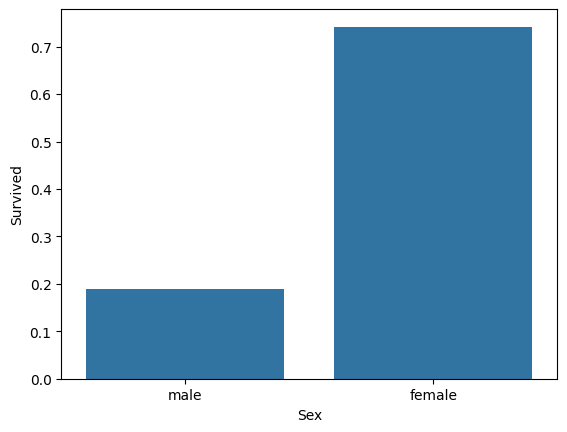

In [25]:
sns.barplot(x='Sex', y='Survived',data=df,ci=None)

여자는 314명중 233명이 생존했고 남자는 577명중 109명만 생존했다. 즉 남자에 비해 여자의 생존률이 두배이상 높은것을 확인할 수 있다. 

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\73311238.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived',data=df,ci=None)


<Axes: xlabel='Pclass', ylabel='Survived'>

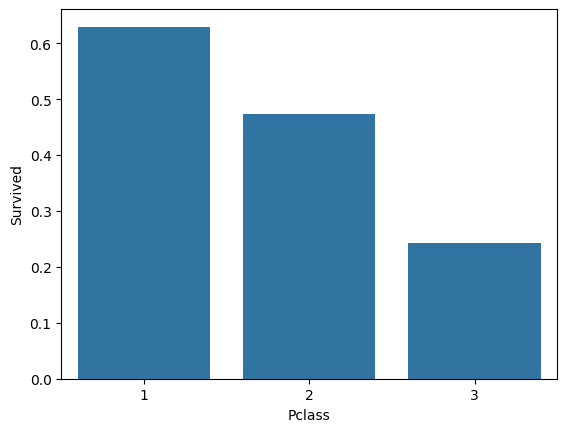

In [26]:
sns.barplot(x='Pclass', y='Survived',data=df,ci=None)

사회등급에 따른 생존률은 1등급이 가장 높았고 그다음은 2등급이고 3등급이 가장 생존률이 낮았다. 

<Axes: xlabel='Pclass', ylabel='Count'>

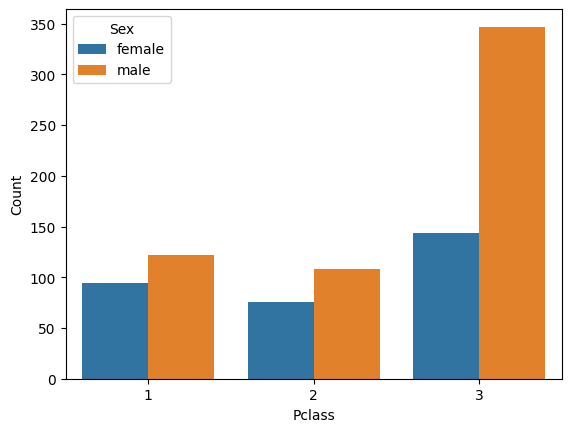

In [27]:
gdata= df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
sns.barplot(x='Pclass', y='Count', hue='Sex', data=gdata)

모든 등급에는 남성의 수가 더 많았고 3등급에는 특히 남성이 많이타고 있었던것을 확인할 수 있다. 

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\2685601958.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)


<Axes: xlabel='Pclass', ylabel='Survived'>

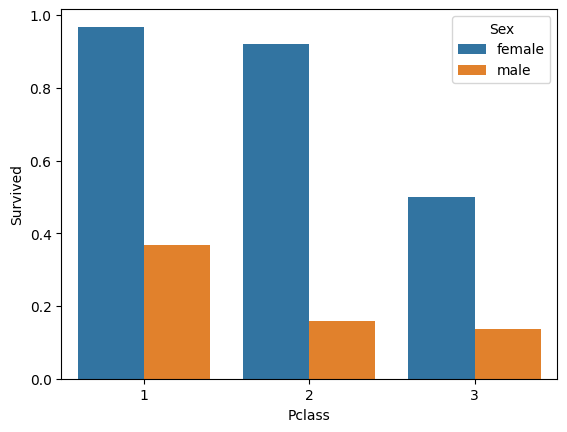

In [28]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)

모든 등급에 남성의 수가 더 많았던것에 비해 생존률은 모든 등급에서 여성이 높았다.

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1872635343.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_data = df.groupby(['age', 'Survived']).size().reset_index(name='Count')


<Axes: xlabel='age', ylabel='Count'>

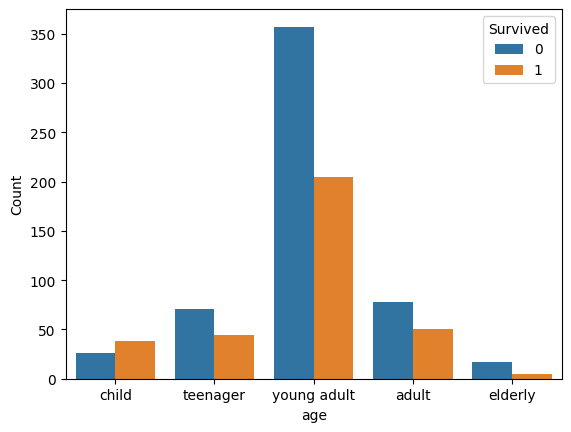

In [29]:
#age라는 새로운 변수를 생성한다.
df['age'] = pd.cut(df['Age'], bins=[0, 10, 20, 40, 60, 100],
                            include_lowest = True,
                            labels = ['child', 'teenager', 'young adult', 'adult', 'elderly'])
g_data = df.groupby(['age', 'Survived']).size().reset_index(name='Count')
sns.barplot(x='age', y='Count', hue='Survived', data=g_data)

나이 각각을 나타내면 표가 너무 복잡해지기 때문에 나이대 별로 묶어서 나타내었다.
10세까지 child , 20세까지 teenager , 40세 까지 young adult, 60세까지 adult, 100세까지 elderly로 각각 나타내었다.

결과를 보면 사망자와 생존자 모두 20에서40세까지 그래프에서 높게 나왔다. 탑승자는 주로 young adult에 해당하는 나이대 사람들이 많았던것을 알 수 있다.

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\4129452651.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='Survived', data=df, ci=None)


<Axes: xlabel='age', ylabel='Survived'>

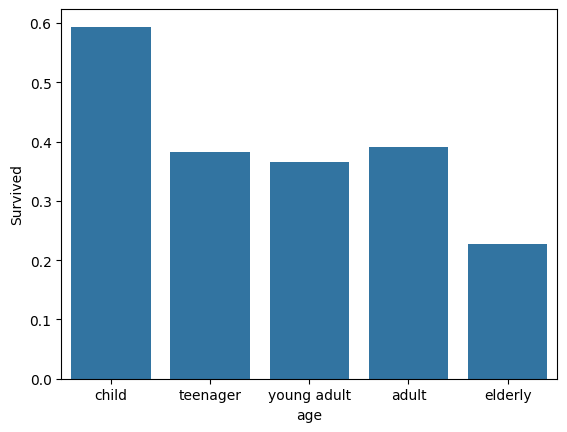

In [30]:
sns.barplot(x='age', y='Survived', data=df, ci=None)

나이가 많은 사람에 비해 상대적으로 어린아이들의 생존률이 높았던 것을 확인할 수 있다. 

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1132883528.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='Survived', hue='Sex', data=df, ci=None)


<Axes: xlabel='age', ylabel='Survived'>

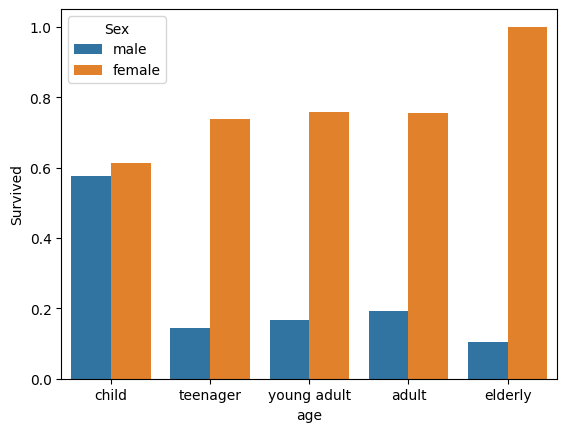

In [31]:
sns.barplot(x='age', y='Survived', hue='Sex', data=df, ci=None)

이그래프에서는 나이와 그 나이를 구성하는 성별의 비율, 그리고 생존률을 한번에 확인할 수 있다.
child를 제외한 모든 나이대에서 생존룰은 여성이 남성보다 압도적으로 높은것을 알 수 있다. 

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\185127083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fare Range', data=df, palette='viridis')


<Axes: xlabel='Fare Range', ylabel='count'>

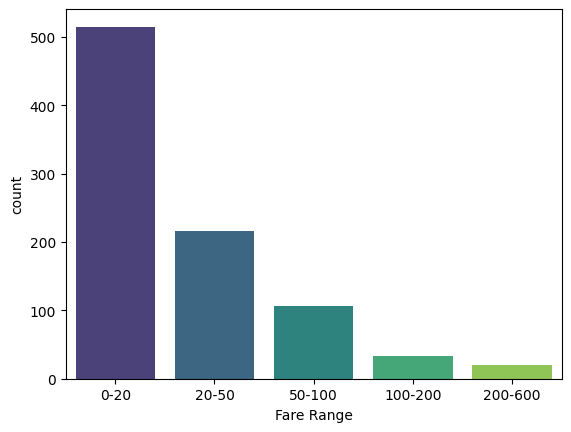

In [32]:
#Fare Range 라는 변수생성
farerange = pd.cut(df['Fare'], 
                     bins=[0, 20, 50, 100, 200, 600], 
                     include_lowest=True,
                     labels=['0-20', '20-50', '50-100', '100-200', '200-600'])
df['Fare Range'] = farerange
sns.countplot(x='Fare Range', data=df, palette='viridis')

티켓요금에 따른 탑승객 분포를 나타낸것이다.
0-20의 저렴한 티켓을 가진 탑승객이 많았다는 것을 알 수 있다.

C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1584487868.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fare Range', y='Survived', data=df, ci=None, palette='muted')
C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1584487868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fare Range', y='Survived', data=df, ci=None, palette='muted')


<Axes: xlabel='Fare Range', ylabel='Survived'>

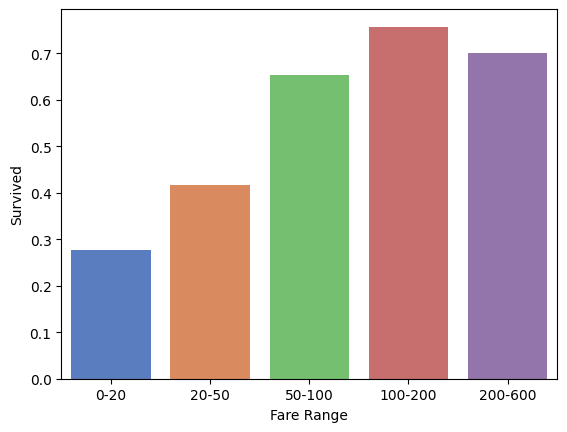

In [33]:
sns.barplot(x='Fare Range', y='Survived', data=df, ci=None, palette='muted')

탑승객이 가장 많았던 가장저렴한 티켓가격인 0-20의 생존률이 가장 낮았고 가장비싼 200-600의 티켓보다 100-200의 티켓을 구매한 탑승객들의 생존률이 더높았던 것을 확인할 수 있다.

In [34]:
df['Family_Size'] = df['SibSp'] + df['Parch'] #새로운 변수 생성
print(df[['SibSp', 'Parch', 'Family_Size']].head())

   SibSp  Parch  Family_Size
0      1      0            1
1      1      0            1
2      0      0            0
3      1      0            1
4      0      0            0


C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1583139890.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Family_Size', y='Survived', data=df, ci=None)


<Axes: xlabel='Family_Size', ylabel='Survived'>

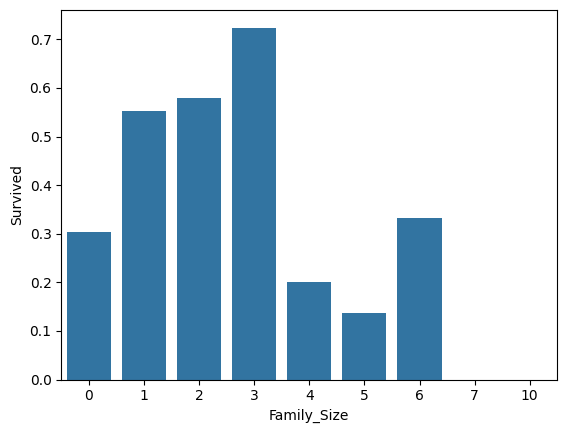

In [35]:
sns.barplot(x='Family_Size', y='Survived', data=df, ci=None)

가족의 구성원이 많을 수록 생존률은 대체적으로 낮은 것을 확인할 수 있다.하지만 구성원이 없는 즉 혼자 탑승한 경우에도 생존률은 높지 않다.

### 생존자 예측

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 필요한 특성 선택
features = ['Pclass', 'Sex', 'Family_Size', 'Fare Range', 'age']
X = df[features]
y = df['Survived']

# 성별을 숫자로 변환 (남성: 0, 여성: 1)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# 'Fare Range' 열을 숫자로 매핑
fare_mapping = {'0-20': 0, '20-50': 1, '50-100': 2, '100-200': 3, '200-600': 4}
X['Fare Range'] = X['Fare Range'].map(fare_mapping)

# 'age' 열을 숫자로 매핑
age_mapping = {'child': 0, 'teenager': 1, 'young adult': 2, 'adult': 3, 'elderly': 4}
X['age'] = X['age'].map(age_mapping)

# 누락된 나이 데이터를 가장 많이 나타나는 범주값으로 대체
X['age'].fillna(X['age'].mode()[0], inplace=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8100558659217877


C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1020351046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1020351046.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare Range'] = X['Fare Range'].map(fare_mapping)
C:\Users\ils09\AppData\Local\Temp\ipykernel_18988\1020351046.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

#### 머신러닝 결과 약 81%의 정확도를 나타냈다. 

In [47]:
# 예측 결과 출력
print("Predictions:")
for i, prediction in enumerate(predictions[:10]):  # 처음 10개의 예측 결과만 출력
    print(f"Passenger {i+1}: {'Survived' if prediction == 1 else 'Not Survived'}")

Predictions:
Passenger 1: Not Survived
Passenger 2: Not Survived
Passenger 3: Not Survived
Passenger 4: Survived
Passenger 5: Not Survived
Passenger 6: Survived
Passenger 7: Survived
Passenger 8: Not Survived
Passenger 9: Survived
Passenger 10: Survived


#### 처음 10명의 생존 및 사망 예측을 출력한 것이다.